# Fraud Detection using Classification techniques

## Executive Summary
Banks are required to report suspected vulnerable (elder and dependent adult) financial exploitation. Today, much of this activity is limited to human interaction (bankers working with customers on the phone or in person), through which bankers may pick up queues, or red flags or customers self-reporting scams or financial abuse to their financial institution. Digital payments have a degree of reported fraud and claims, with the assumption that much more unreported losses occur, especially perpetrated against older adults (60 years of age or older). As digital payments continue to expand across all demographics, research shows that older adults are showing the biggest uptick in adoption during the 2020/21 period due to the pandemic. Currently, digital payment data is not analyzed specifically under the vulnerable (elder and dependent adult) financial exploitation lens. Banks are required to report elder financial abuse but, unless a customer reports fraud and files a claim, financial abuse can go undetected and repeated fraud via digital payments can continue without the banks’ knowledge. Without detection models, a large amount of fraud is left unreported by consumers and elder and vulnerable adult populations will be at greater risk of being targeted and losing savings to fraudulent payments.

Banks need better methods to help protect elder and vulnerable adults against fraud in the digital payments landscape. Predictive modeling may also be applied in some form to alert consumers and bankers in advance of a fraud attempt and potentially pre-empt certain transactions and monetary losses. As the older adult segment continues to adopt digital technology, including digital payments, banks need better ways to predict and analyze transaction data to detect high risk payment patterns or transaction attributes that signal high risk for fraud, especially for older and vulnerable adult customers, which could be targeted by scammers.

## Objective

To develop a machine learning model to predict suspected elder fraud in the digital payments space.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from pathlib import Path

In [173]:
#numpy, scipy, pandas, seaborn and sklearn package versions used throughout the project1
print(np.__version__)
print(sns.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.21.6
0.11.2
1.3.5
1.0.2


## Data Exploration

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
data_folder = Path('/content/drive/MyDrive/WellsFargoDataset_Classification.csv')

In [176]:
# creating Pandas Dataframe
df = pd.read_csv(data_folder)
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,...,CUST_STATE,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD
0,5.38,23619.91,47,4,2777,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,...,NV,2/24/2021 15:55:10,1993-01-06 00:00:00,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud
1,65.19,0.00,45,5,2721,NaN,charter communications,southwest,california,MOBL,...,CA,NaN,1971-01-07 00:00:00,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud
2,54.84,34570.63,36,8,1531,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,...,MD,5/5/2019 1:8:39,1994-02-01 00:00:00,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud
3,0.01,0.00,62,3,835,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,...,NV,2/16/2019 6:45:37,2001-11-01 00:00:00,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud
4,497.08,12725.18,81,2,1095,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,...,UT,5/8/2020 10:27:6,1987-02-07 00:00:00,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,142,NaN,cellco partnership dba verizon wireless,southwest,california,MOBL,...,CA,7/15/2017 6:58:59,2001-06-05 00:00:00,3/12/2021 12:11:59,3/12/2021,SCHPMT,P2P_COMMIT,P2P,3/12/2021,Non-Fraud
13996,114.38,0.00,44,10,272,11/2/2017 4:28:20,t-mobile usa inc.,southwest,california,MOBL,...,CO,NaN,2010-06-03 00:00:00,6/11/2021 9:28:20,6/11/2021,SCHPMT,P2P_COMMIT,P2P,6/11/2021,Non-Fraud
13997,493.00,2848.63,54,3,517,6/3/2021 19:31:15,att services inc,southwest,california,MOBL,...,FL,5/25/2021 8:50:5,1984-10-27 00:00:00,5/16/2021 12:31:15,5/16/2021,SCHPMT,P2P_COMMIT,P2P,5/16/2021,Fraud
13998,491.64,3163.25,21,3,0,3/2/2020 11:34:54,NaN,NaN,NaN,ONLN,...,CA,NaN,2021-03-01 00:00:00,5/11/2021 12:34:54,5/11/2021,SCHPMT,P2P_COMMIT,P2P,5/11/2021,Fraud


In [177]:
df.describe()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP
count,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000,14000.000000
mean,275.377747,10233.110609,53.937214,6.666714,611.061571,74007.681071
std,317.892333,29967.453812,18.829836,9.059419,668.113489,24948.053588
min,0.010000,0.000000,13.000000,0.000000,-117.000000,0.000000
25%,11.322500,0.000000,39.000000,3.000000,75.000000,63123.000000
50%,161.355000,2410.395000,59.000000,5.000000,365.500000,85037.000000
75%,488.822500,4732.695000,68.000000,7.000000,961.000000,92201.000000
max,2376.060000,361519.050000,105.000000,227.000000,2783.000000,99835.000000


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 14000 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  14000 non-null  float64
 2   CUST_AGE                 14000 non-null  int64  
 3   OPEN_ACCT_CT             14000 non-null  int64  
 4   WF_dvc_age               14000 non-null  int64  
 5   PWD_UPDT_TS              10875 non-null  object 
 6   CARR_NAME                11291 non-null  object 
 7   RGN_NAME                 11291 non-null  object 
 8   STATE_PRVNC_TXT          11291 non-null  object 
 9   ALERT_TRGR_CD            14000 non-null  object 
 10  DVC_TYPE_TXT             12239 non-null  object 
 11  AUTHC_PRIM_TYPE_CD       14000 non-null  object 
 12  AUTHC_SCNDRY_STAT_TXT    13926 non-null  object 
 13  CUST_ZIP                 14000 non-null  int64  
 14  CUST_STATE            

Since our focus is on older adults (60 years of age or older) and dependent adult (18 and above who is admitted as an inpatient to a 24-hour facility).
We filter the customer age to be above 18.
Note: A dependent adult is an adult who is not a senior citizen and who needs assistance to carry out normal activities or to protect their rights, or who is in a hospital for at least a 24-hour stay

In [179]:
df = df[df['CUST_AGE'] >= 18]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TRAN_AMT                 13879 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL  13879 non-null  float64
 2   CUST_AGE                 13879 non-null  int64  
 3   OPEN_ACCT_CT             13879 non-null  int64  
 4   WF_dvc_age               13879 non-null  int64  
 5   PWD_UPDT_TS              10787 non-null  object 
 6   CARR_NAME                11203 non-null  object 
 7   RGN_NAME                 11203 non-null  object 
 8   STATE_PRVNC_TXT          11203 non-null  object 
 9   ALERT_TRGR_CD            13879 non-null  object 
 10  DVC_TYPE_TXT             12138 non-null  object 
 11  AUTHC_PRIM_TYPE_CD       13879 non-null  object 
 12  AUTHC_SCNDRY_STAT_TXT    13809 non-null  object 
 13  CUST_ZIP                 13879 non-null  int64  
 14  CUST_STATE            

**Missing Values**

In [180]:
# Missing Values :
print (df.isna().sum())

TRAN_AMT                      0
ACCT_PRE_TRAN_AVAIL_BAL       0
CUST_AGE                      0
OPEN_ACCT_CT                  0
WF_dvc_age                    0
PWD_UPDT_TS                3092
CARR_NAME                  2676
RGN_NAME                   2676
STATE_PRVNC_TXT            2676
ALERT_TRGR_CD                 0
DVC_TYPE_TXT               1741
AUTHC_PRIM_TYPE_CD            0
AUTHC_SCNDRY_STAT_TXT        70
CUST_ZIP                      0
CUST_STATE                   36
PH_NUM_UPDT_TS             7005
CUST_SINCE_DT                 0
TRAN_TS                       0
TRAN_DT                       0
ACTN_CD                       0
ACTN_INTNL_TXT                0
TRAN_TYPE_CD                  0
ACTVY_DT                      0
FRAUD_NONFRAUD                0
dtype: int64


In [181]:
df.describe()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP
count,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000
mean,274.713969,10190.003056,54.272282,6.651056,609.874415,74045.045608
std,317.503017,29942.871238,18.564696,9.045851,667.554750,24940.680268
min,0.010000,0.000000,18.000000,0.000000,-117.000000,0.000000
25%,11.190000,0.000000,39.000000,3.000000,75.000000,64121.000000
50%,159.930000,2397.200000,59.000000,5.000000,363.000000,85042.000000
75%,488.750000,4691.955000,68.000000,7.000000,959.000000,92203.000000
max,2376.060000,361519.050000,105.000000,227.000000,2783.000000,99835.000000


## Exploratory Data Analysis

In [184]:
import pylab as plt

# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(15, 10))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (12, 12)

# Size of matplotlib histogram bins
bin_size = 10

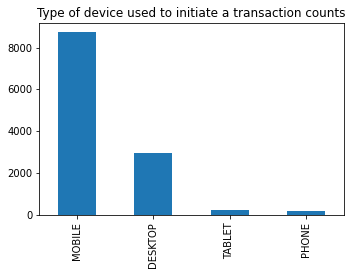

In [187]:
# Set up a grid of plots
fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Plot fraus and nonfraud counts
plt.subplot2grid(fig_dims, (0, 0))
df['FRAUD_NONFRAUD'].value_counts().plot(kind='bar', 
                                         title='Fraud and NonFraud Counts')

# Plot type of device used for transaction counts
plt.subplot2grid(fig_dims, (0, 1))
df['DVC_TYPE_TXT'].value_counts().plot(kind='bar', 
                                       title='Type of device used to initiate a transaction counts')

# Plot primary authentication counts
plt.subplot2grid(fig_dims, (1, 0))
df['AUTHC_PRIM_TYPE_CD'].value_counts().plot(kind='bar', 
                                    title='Authentication Primary Type Code Counts')
plt.xticks(rotation=0)

# Plot secondary authentication counts
plt.subplot2grid(fig_dims, (1, 1))
df['AUTHC_SCNDRY_STAT_TXT'].value_counts().plot(kind='bar', 
                                        title='Authentication Secondary Type Code Counts')

# Plot alert counts
plt.subplot2grid(fig_dims, (1, 1))
df['ALERT_TRGR_CD'].value_counts().plot(kind='bar', 
                                        title='Alert triggered Counts')

# Plot the transaction ammount histogram
plt.subplot2grid(fig_dims, (2, 0))
df['TRAN_AMT'].hist()
plt.title('TRAN_AMT Histogram')

**Feature 1 : CUST_AGE**

CUST_AGE can be diveded into two chunks: 1st chunk = vulnerable adults (60 and above) and 2nd chunk = dependent adults (18-60)

In [ ]:
pd.options.mode.chained_assignment = None 

df.loc[df['CUST_AGE'] >= 60, 'CUST_AGE_NEW'] = 'vuln_adult'
df.loc[df['CUST_AGE'] < 60, 'CUST_AGE_NEW'] = 'dep_adult'

In [ ]:
ageclass_xt = pd.crosstab(df['CUST_AGE_NEW'], df['FRAUD_NONFRAUD'])
ageclass_xt

FRAUD_NONFRAUD,Fraud,Non-Fraud
CUST_AGE_NEW,,
dep_adult,2032,4927
vuln_adult,2076,4844


Text(0, 0.5, 'Fraud Rate')

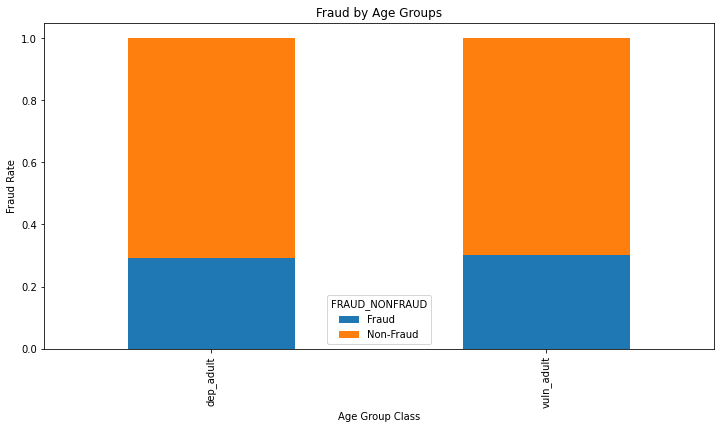

In [ ]:
# Normalize the cross tab to sum to 1:
ageclass_xt_pct = ageclass_xt.div(ageclass_xt.sum(1).astype(float), axis=0)

ageclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Fraud by Age Groups')
plt.xlabel('Age Group Class')
plt.ylabel('Fraud Rate')

We see that the rate of Fraud is almost the same in both the classes vulnerable adults (60 and above) and dependent adults (18-60).

**Feature 2 : ALERT_TRGR_CD**

Feature : ALERT_TRGR_CD represents Code refers to the trigger of an alert. This column has no missing data.

In [ ]:
alert_xt = pd.crosstab(df['ALERT_TRGR_CD'], df['FRAUD_NONFRAUD'])
alert_xt

FRAUD_NONFRAUD,Fraud,Non-Fraud
ALERT_TRGR_CD,,
MOBL,1575,5484
ONLN,2533,4287


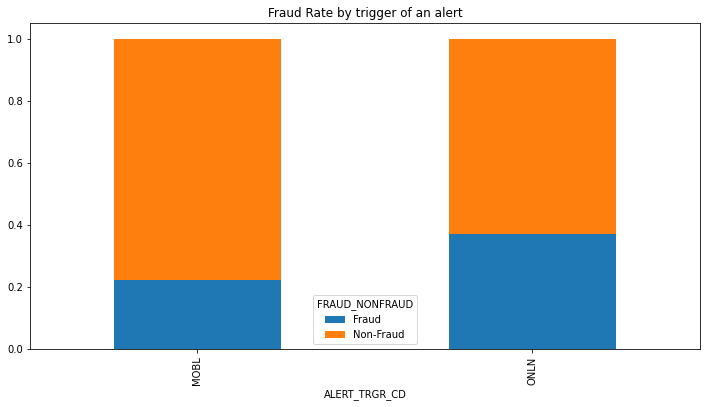

In [ ]:
alert_xt_pct = alert_xt.div(alert_xt.sum(1).astype(float), axis=0)
alert_xt_pct.plot(kind='bar', stacked=True, title='Fraud Rate by trigger of an alert')

Trigger alert code ONLN has more Fraud rate as compared to MOBL. 

**Feature 3: DVC_TYPE_TXT**

Feature: DVC_TYPE_TXT represents Type of device used to initiate a transaction. This column has 1741 missing values.

In [ ]:
DVC_TYPE_xt = pd.crosstab(df['DVC_TYPE_TXT'], df['FRAUD_NONFRAUD'])
DVC_TYPE_xt

FRAUD_NONFRAUD,Fraud,Non-Fraud
DVC_TYPE_TXT,,
DESKTOP,1468,1491
MOBILE,1560,7169
PHONE,68,149
TABLET,77,156


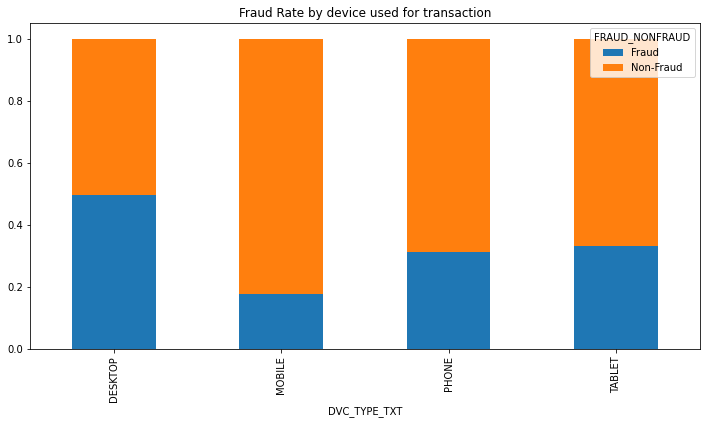

In [ ]:
DVC_TYPE_pct = DVC_TYPE_xt.div(DVC_TYPE_xt.sum(1).astype(float), axis=0)
DVC_TYPE_pct.plot(kind='bar', stacked=True, title='Fraud Rate by device used for transaction')

Clearly, DESKTOP is most frequently used for Fraudulent transactions followed by TABLET,PHONE and MOBILE.

**Feature 4: CUST_STATE**

Feature: CUST_STATE represents the state in which the customer resides. This column has 36 missing values.

In [ ]:
CUST_STATE_xt = pd.crosstab(df['CUST_STATE'], df['FRAUD_NONFRAUD'])

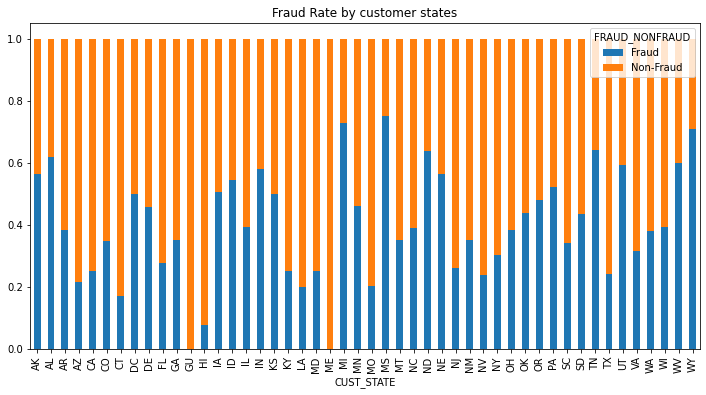

In [ ]:
CUST_STATE_pct = CUST_STATE_xt.div(CUST_STATE_xt.sum(1).astype(float), axis=0)
CUST_STATE_pct.plot(kind='bar', stacked=True, title='Fraud Rate by customer states')

Customers from MS i.e. Massachusetts state seems to have maximum Frauds while GU i.e. GUAM has the least.

**Feature 5: AUTHC_PRIM_TYPE_CD**

Feature : AUTHC_PRIM_TYPE_CD represents the primary Authentication method that is used. 

In [ ]:
AUTHC_PRIM_xt = pd.crosstab(df['AUTHC_PRIM_TYPE_CD'], df['FRAUD_NONFRAUD'])
AUTHC_PRIM_xt

FRAUD_NONFRAUD,Fraud,Non-Fraud
AUTHC_PRIM_TYPE_CD,,
AFA_BM,0,89
AFA_PL,114,598
FACE_ID,510,1418
TOUCH_ID,151,538
UN_PWD,3333,7128


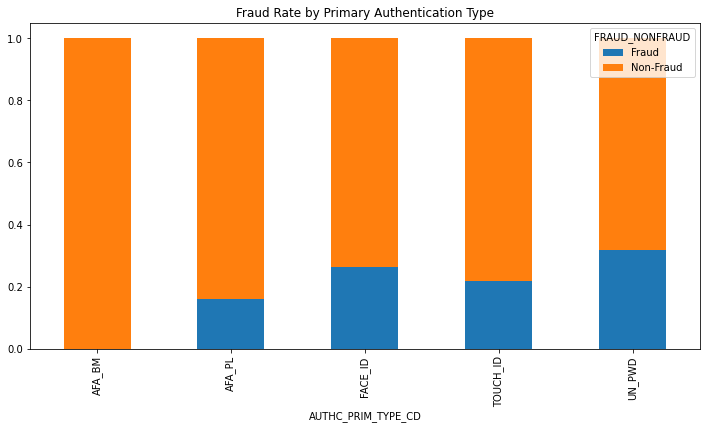

In [ ]:
AUTHC_PRIM_pct = AUTHC_PRIM_xt.div(AUTHC_PRIM_xt.sum(1).astype(float), axis=0)
AUTHC_PRIM_pct.plot(kind='bar', stacked=True, title='Fraud Rate by Primary Authentication Type')

UN_PWD i.e. Username/Password Authentication has the maximum Fraud rate while AFA_BM has the least.

**Feature 6: AUTHC_SCNDRY_STAT_TXT**

Feature : AUTHC_SCNDRY_STAT_TXT represents the secondary Authentication method that is used.This coulmn has 70 missing values.

In [ ]:
AUTHC_SEC_xt = pd.crosstab(df['AUTHC_SCNDRY_STAT_TXT'], df['FRAUD_NONFRAUD'])
AUTHC_SEC_xt

FRAUD_NONFRAUD,Fraud,Non-Fraud
AUTHC_SCNDRY_STAT_TXT,,
ALLOW,3796,9294
CHALLENGE_ISSUED,31,53
CHALLENGE_SUCCESS,281,354


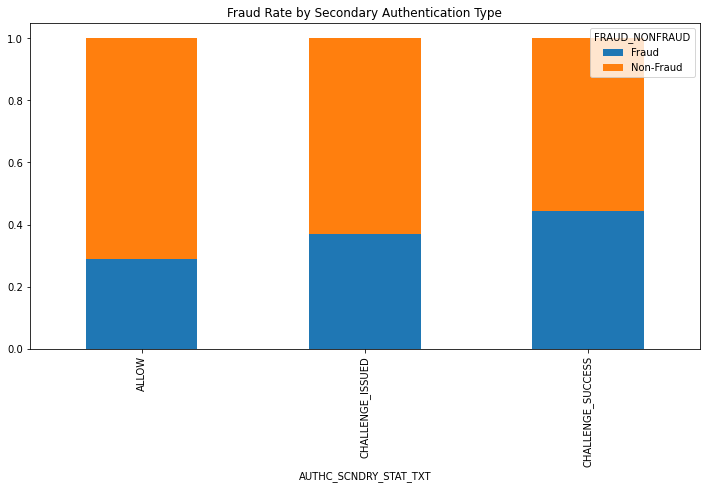

In [ ]:
AUTHC_SEC_pct = AUTHC_SEC_xt.div(AUTHC_SEC_xt.sum(1).astype(float), axis=0)
AUTHC_SEC_pct.plot(kind='bar', stacked=True, title='Fraud Rate by Secondary Authentication Type')

CHALLENGE_SUCCESS Authentication has the maximum Fraud rate while ALLOW has the least.

## Data Preparation and Imputation of Missing Values:

WF_DVC_AGE represents the number of days customer identified to be assciated to device. There are some negative values in this column which might be due to human error. Lets make them positive.
Negative values are: -117, -111, -102, -88, -33

In [ ]:
df = df.replace({'WF_dvc_age' : { -117 : 117, -111 : 111, -102 : 102, -88 : 88, -33 : 33 }})

In [ ]:
df.describe()

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,WF_dvc_age,CUST_ZIP
count,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000,13879.000000
mean,274.713969,10190.003056,54.272282,6.651056,609.990273,74045.045608
std,317.503017,29942.871238,18.564696,9.045851,667.448877,24940.680268
min,0.010000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,11.190000,0.000000,39.000000,3.000000,75.000000,64121.000000
50%,159.930000,2397.200000,59.000000,5.000000,363.000000,85042.000000
75%,488.750000,4691.955000,68.000000,7.000000,959.000000,92203.000000
max,2376.060000,361519.050000,105.000000,227.000000,2783.000000,99835.000000


TRAN_DT values are only for 2021. Considering WF_dvc_age i.e. the no of days customer was identified to be associated to device should be 365 days. We expect that the device was associated for atleast 2021 since all the transactions are done in 2021.
So we can map <= 365 days as 1 i.e. the device was identified to be associated in 2021 for recent transactions. The new column WF_dvc_age_NEW is created and WF_dvc_age is dropped.

In [ ]:
pd.options.mode.chained_assignment = None 

df.loc[df['WF_dvc_age'] > 365, 'WF_dvc_age_NEW'] = 'old'
df.loc[df['WF_dvc_age'] <= 365 , 'WF_dvc_age_NEW'] = 'recent'

In [ ]:
df['WF_dvc_age_NEW'] = df['WF_dvc_age_NEW'].map({'recent':1, 'old':0}).astype(int)
df = df.drop(['WF_dvc_age'], axis=1)
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,...,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,CUST_AGE_NEW,WF_dvc_age_NEW
0,5.38,23619.91,47,4,1/16/2018 11:3:58,cox communications inc.,southwest,nevada,MOBL,NaN,...,1993-01-06 00:00:00,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud,dep_adult,0
1,65.19,0.00,45,5,NaN,charter communications,southwest,california,MOBL,NaN,...,1971-01-07 00:00:00,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud,dep_adult,0
2,54.84,34570.63,36,8,12/22/2021 10:42:51,utah broadband llc,mountain,utah,ONLN,DESKTOP,...,1994-02-01 00:00:00,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud,dep_adult,0
3,0.01,0.00,62,3,2/8/2020 7:28:31,t-mobile usa inc.,southwest,california,MOBL,MOBILE,...,2001-11-01 00:00:00,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,vuln_adult,0
4,497.08,12725.18,81,2,12/28/2020 12:12:44,cogent communications,south central,texas,MOBL,MOBILE,...,1987-02-07 00:00:00,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud,vuln_adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,NaN,cellco partnership dba verizon wireless,southwest,california,MOBL,MOBILE,...,2001-06-05 00:00:00,3/12/2021 12:11:59,3/12/2021,SCHPMT,P2P_COMMIT,P2P,3/12/2021,Non-Fraud,dep_adult,1
13996,114.38,0.00,44,10,11/2/2017 4:28:20,t-mobile usa inc.,southwest,california,MOBL,MOBILE,...,2010-06-03 00:00:00,6/11/2021 9:28:20,6/11/2021,SCHPMT,P2P_COMMIT,P2P,6/11/2021,Non-Fraud,dep_adult,1
13997,493.00,2848.63,54,3,6/3/2021 19:31:15,att services inc,southwest,california,MOBL,DESKTOP,...,1984-10-27 00:00:00,5/16/2021 12:31:15,5/16/2021,SCHPMT,P2P_COMMIT,P2P,5/16/2021,Fraud,dep_adult,0
13998,491.64,3163.25,21,3,3/2/2020 11:34:54,NaN,NaN,NaN,ONLN,DESKTOP,...,2021-03-01 00:00:00,5/11/2021 12:34:54,5/11/2021,SCHPMT,P2P_COMMIT,P2P,5/11/2021,Fraud,dep_adult,1


PWD_UPDT_TS -> Date and time when Wells Fargo customer's password was last updated. This is an important feature because if the password was not updated recently (with reference to the transaction) then there the ransaction is likely to be fraud.
If the difference between PWD_UPDT_TS and TRAN_DT is <= 6 months -> then the password was recently updated otherwise not updated => 1. 

When I executed a code i got an error saying that the day is out of range of the month. This is because we has day as 31st for the month of june in some instances. To solve this issue we create a function to subtract one day from such instances so that it will be in range for the month of June.

In [ ]:
def subtract_1_day(match):
    days = int(match.group(1))
    return str(days - 1)

df['PWD_UPDT_TS'] = pd.to_datetime(df['PWD_UPDT_TS'], errors='coerce')
fixed_dates = df.loc[df['PWD_UPDT_TS'].isna(), 'PWD_UPDT_TS'].replace(r"(?<=/)(\d+)(?=/)", subtract_1_day)
df['PWD_UPDT_TS'].update(pd.to_datetime(fixed_dates, format="%m/%d/%Y"))
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,PWD_UPDT_TS,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,...,CUST_SINCE_DT,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,CUST_AGE_NEW,WF_dvc_age_NEW
0,5.38,23619.91,47,4,2018-01-16 11:03:58,cox communications inc.,southwest,nevada,MOBL,NaN,...,1993-01-06 00:00:00,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud,dep_adult,0
1,65.19,0.00,45,5,NaT,charter communications,southwest,california,MOBL,NaN,...,1971-01-07 00:00:00,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud,dep_adult,0
2,54.84,34570.63,36,8,2021-12-22 10:42:51,utah broadband llc,mountain,utah,ONLN,DESKTOP,...,1994-02-01 00:00:00,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud,dep_adult,0
3,0.01,0.00,62,3,2020-02-08 07:28:31,t-mobile usa inc.,southwest,california,MOBL,MOBILE,...,2001-11-01 00:00:00,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,vuln_adult,0
4,497.08,12725.18,81,2,2020-12-28 12:12:44,cogent communications,south central,texas,MOBL,MOBILE,...,1987-02-07 00:00:00,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud,vuln_adult,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,NaT,cellco partnership dba verizon wireless,southwest,california,MOBL,MOBILE,...,2001-06-05 00:00:00,3/12/2021 12:11:59,3/12/2021,SCHPMT,P2P_COMMIT,P2P,3/12/2021,Non-Fraud,dep_adult,1
13996,114.38,0.00,44,10,2017-11-02 04:28:20,t-mobile usa inc.,southwest,california,MOBL,MOBILE,...,2010-06-03 00:00:00,6/11/2021 9:28:20,6/11/2021,SCHPMT,P2P_COMMIT,P2P,6/11/2021,Non-Fraud,dep_adult,1
13997,493.00,2848.63,54,3,2021-06-03 19:31:15,att services inc,southwest,california,MOBL,DESKTOP,...,1984-10-27 00:00:00,5/16/2021 12:31:15,5/16/2021,SCHPMT,P2P_COMMIT,P2P,5/16/2021,Fraud,dep_adult,0
13998,491.64,3163.25,21,3,2020-03-02 11:34:54,NaN,NaN,NaN,ONLN,DESKTOP,...,2021-03-01 00:00:00,5/11/2021 12:34:54,5/11/2021,SCHPMT,P2P_COMMIT,P2P,5/11/2021,Fraud,dep_adult,1


We then create new column PWD_UPDT_DT representing only the Date when the password was updated. Drop the PWD_UPDT_TS column.

In [ ]:
df['PWD_UPDT_DT'] = df['PWD_UPDT_TS'].dt.date
df.drop('PWD_UPDT_TS', axis = 1, inplace = True)
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,...,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,CUST_AGE_NEW,WF_dvc_age_NEW,PWD_UPDT_DT
0,5.38,23619.91,47,4,cox communications inc.,southwest,nevada,MOBL,NaN,UN_PWD,...,5/3/2021 18:3:58,5/3/2021,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud,dep_adult,0,2018-01-16
1,65.19,0.00,45,5,charter communications,southwest,california,MOBL,NaN,FACE_ID,...,1/13/2021 19:19:37,1/13/2021,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud,dep_adult,0,NaT
2,54.84,34570.63,36,8,utah broadband llc,mountain,utah,ONLN,DESKTOP,UN_PWD,...,4/8/2021 9:42:51,4/8/2021,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud,dep_adult,0,2021-12-22
3,0.01,0.00,62,3,t-mobile usa inc.,southwest,california,MOBL,MOBILE,UN_PWD,...,8/10/2021 15:28:31,8/10/2021,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,vuln_adult,0,2020-02-08
4,497.08,12725.18,81,2,cogent communications,south central,texas,MOBL,MOBILE,UN_PWD,...,6/27/2021 11:12:44,6/27/2021,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud,vuln_adult,0,2020-12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,cellco partnership dba verizon wireless,southwest,california,MOBL,MOBILE,UN_PWD,...,3/12/2021 12:11:59,3/12/2021,SCHPMT,P2P_COMMIT,P2P,3/12/2021,Non-Fraud,dep_adult,1,NaT
13996,114.38,0.00,44,10,t-mobile usa inc.,southwest,california,MOBL,MOBILE,FACE_ID,...,6/11/2021 9:28:20,6/11/2021,SCHPMT,P2P_COMMIT,P2P,6/11/2021,Non-Fraud,dep_adult,1,2017-11-02
13997,493.00,2848.63,54,3,att services inc,southwest,california,MOBL,DESKTOP,UN_PWD,...,5/16/2021 12:31:15,5/16/2021,SCHPMT,P2P_COMMIT,P2P,5/16/2021,Fraud,dep_adult,0,2021-06-03
13998,491.64,3163.25,21,3,NaN,NaN,NaN,ONLN,DESKTOP,UN_PWD,...,5/11/2021 12:34:54,5/11/2021,SCHPMT,P2P_COMMIT,P2P,5/11/2021,Fraud,dep_adult,1,2020-03-02


In [ ]:
# Changing the Dtype to datetime
df['PWD_UPDT_DT'] = pd.to_datetime(df['PWD_UPDT_DT'])
df['TRAN_DT'] = pd.to_datetime(df['TRAN_DT'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  13879 non-null  float64       
 2   CUST_AGE                 13879 non-null  int64         
 3   OPEN_ACCT_CT             13879 non-null  int64         
 4   CARR_NAME                11203 non-null  object        
 5   RGN_NAME                 11203 non-null  object        
 6   STATE_PRVNC_TXT          11203 non-null  object        
 7   ALERT_TRGR_CD            13879 non-null  object        
 8   DVC_TYPE_TXT             12138 non-null  object        
 9   AUTHC_PRIM_TYPE_CD       13879 non-null  object        
 10  AUTHC_SCNDRY_STAT_TXT    13809 non-null  object        
 11  CUST_ZIP                 13879 non-null  int64         
 12  CUST_STATE               13843 n

We then create months_pwd column to find the no of months before the transaction the password was updated.In some instances password was updated after the transation was done. In such instances the value for months comes out to be negative. We will handle this later.

In [ ]:
df['months_pwd'] = (df['TRAN_DT'] - df['PWD_UPDT_DT'])/np.timedelta64(1, 'M')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  13879 non-null  float64       
 2   CUST_AGE                 13879 non-null  int64         
 3   OPEN_ACCT_CT             13879 non-null  int64         
 4   CARR_NAME                11203 non-null  object        
 5   RGN_NAME                 11203 non-null  object        
 6   STATE_PRVNC_TXT          11203 non-null  object        
 7   ALERT_TRGR_CD            13879 non-null  object        
 8   DVC_TYPE_TXT             12138 non-null  object        
 9   AUTHC_PRIM_TYPE_CD       13879 non-null  object        
 10  AUTHC_SCNDRY_STAT_TXT    13809 non-null  object        
 11  CUST_ZIP                 13879 non-null  int64         
 12  CUST_STATE               13843 n

There are 3092 missing values in the column PWD_UPDT_DT. We can assume that the password was not updated since the account was opened for these instances. I am imputing -1 for these instances.We also convert this column to int type.

In [ ]:
df['months_pwd'] = df['months_pwd'].replace(np.NaN, -1)
df['months_pwd'] = df['months_pwd'].astype(int)

We can assume that the password was updated recently if the 0<= months_pwd <= 6 -> This is mapped as 1.We create a new column recentpwdupdate to store these values and drop 'PWD_UPDT_DT','months_pwd' columns.

In [ ]:
df['recentpwdupdate'] =np.where((df['months_pwd'] >= 0) & (df['months_pwd'] <= 6) , 1, 0)
df = df.drop(columns = {'PWD_UPDT_DT','months_pwd'})
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,CARR_NAME,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,...,TRAN_TS,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,CUST_AGE_NEW,WF_dvc_age_NEW,recentpwdupdate
0,5.38,23619.91,47,4,cox communications inc.,southwest,nevada,MOBL,NaN,UN_PWD,...,5/3/2021 18:3:58,2021-05-03,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud,dep_adult,0,0
1,65.19,0.00,45,5,charter communications,southwest,california,MOBL,NaN,FACE_ID,...,1/13/2021 19:19:37,2021-01-13,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud,dep_adult,0,0
2,54.84,34570.63,36,8,utah broadband llc,mountain,utah,ONLN,DESKTOP,UN_PWD,...,4/8/2021 9:42:51,2021-04-08,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud,dep_adult,0,0
3,0.01,0.00,62,3,t-mobile usa inc.,southwest,california,MOBL,MOBILE,UN_PWD,...,8/10/2021 15:28:31,2021-08-10,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,vuln_adult,0,0
4,497.08,12725.18,81,2,cogent communications,south central,texas,MOBL,MOBILE,UN_PWD,...,6/27/2021 11:12:44,2021-06-27,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud,vuln_adult,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,cellco partnership dba verizon wireless,southwest,california,MOBL,MOBILE,UN_PWD,...,3/12/2021 12:11:59,2021-03-12,SCHPMT,P2P_COMMIT,P2P,3/12/2021,Non-Fraud,dep_adult,1,0
13996,114.38,0.00,44,10,t-mobile usa inc.,southwest,california,MOBL,MOBILE,FACE_ID,...,6/11/2021 9:28:20,2021-06-11,SCHPMT,P2P_COMMIT,P2P,6/11/2021,Non-Fraud,dep_adult,1,0
13997,493.00,2848.63,54,3,att services inc,southwest,california,MOBL,DESKTOP,UN_PWD,...,5/16/2021 12:31:15,2021-05-16,SCHPMT,P2P_COMMIT,P2P,5/16/2021,Fraud,dep_adult,0,1
13998,491.64,3163.25,21,3,NaN,NaN,NaN,ONLN,DESKTOP,UN_PWD,...,5/11/2021 12:34:54,2021-05-11,SCHPMT,P2P_COMMIT,P2P,5/11/2021,Fraud,dep_adult,1,0


CARR_NAME represents the name of the carrier derived from Internet Protocol (IP) Address of the customer's device. There are many unique values in this column and there are 2676 missing values in this column. Therefore, we create a new column CARR_NAME_avail which tells us if the carrier info is available or not. If the info is available we map it to 1. We then drop the 'CARR_NAME' column.

In [ ]:
# Carr info available = 1, not available = 0
df['CARR_NAME_avail'] =np.where((df['CARR_NAME'] == np.NaN) , 0, 1)
df = df.drop(['CARR_NAME'], axis=1)
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,RGN_NAME,STATE_PRVNC_TXT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,...,TRAN_DT,ACTN_CD,ACTN_INTNL_TXT,TRAN_TYPE_CD,ACTVY_DT,FRAUD_NONFRAUD,CUST_AGE_NEW,WF_dvc_age_NEW,recentpwdupdate,CARR_NAME_avail
0,5.38,23619.91,47,4,southwest,nevada,MOBL,NaN,UN_PWD,ALLOW,...,2021-05-03,SCHPMT,P2P_COMMIT,P2P,5/3/2021,Non-Fraud,dep_adult,0,0,1
1,65.19,0.00,45,5,southwest,california,MOBL,NaN,FACE_ID,ALLOW,...,2021-01-13,SCHPMT,P2P_COMMIT,P2P,1/13/2021,Non-Fraud,dep_adult,0,0,1
2,54.84,34570.63,36,8,mountain,utah,ONLN,DESKTOP,UN_PWD,ALLOW,...,2021-04-08,SCHPMT,P2P_COMMIT,P2P,4/8/2021,Fraud,dep_adult,0,0,1
3,0.01,0.00,62,3,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,...,2021-08-10,SCHPMT,P2P_COMMIT,P2P,8/10/2021,Non-Fraud,vuln_adult,0,0,1
4,497.08,12725.18,81,2,south central,texas,MOBL,MOBILE,UN_PWD,CHALLENGE_SUCCESS,...,2021-06-27,SCHPMT,P2P_COMMIT,P2P,6/27/2021,Fraud,vuln_adult,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,southwest,california,MOBL,MOBILE,UN_PWD,ALLOW,...,2021-03-12,SCHPMT,P2P_COMMIT,P2P,3/12/2021,Non-Fraud,dep_adult,1,0,1
13996,114.38,0.00,44,10,southwest,california,MOBL,MOBILE,FACE_ID,ALLOW,...,2021-06-11,SCHPMT,P2P_COMMIT,P2P,6/11/2021,Non-Fraud,dep_adult,1,0,1
13997,493.00,2848.63,54,3,southwest,california,MOBL,DESKTOP,UN_PWD,ALLOW,...,2021-05-16,SCHPMT,P2P_COMMIT,P2P,5/16/2021,Fraud,dep_adult,0,1,1
13998,491.64,3163.25,21,3,NaN,NaN,ONLN,DESKTOP,UN_PWD,ALLOW,...,2021-05-11,SCHPMT,P2P_COMMIT,P2P,5/11/2021,Fraud,dep_adult,1,0,1


RGN_NAME represents the name of regions derived from Internet Protocol (IP) Address of the customer's device.Since there are many unique values we drop this column. We customer state and transaction state to determine whether the transaction happened in the different state. 

In [ ]:
# region name can be dropped. We will use cust_state and trax_state instead
df = df.drop(['RGN_NAME'], axis=1)

The column CUST_ZIP has a zip code 22480 for which CUST_STATE is not available. This belongs to state VA. The state where the transaction happened is california for this instance.For rest of the missing values in CUST_STATE, CUST_ZIP is '0'. This can be treated as NaN. We can drop CUST_ZIP and focus on CUST_STATE & STATE_PRVNC_TXT.

In [ ]:
df = df.drop(['CUST_ZIP'], axis=1)

We first replace STATE_PRVNC_TXT with the same format as CUST_STATE. This will help us identify if the transaction was done in the same state as that of customer state. If the Transaction didnt happen in the customer state intuitively it is more likely to be fraudulent.
We create a new column STATE_Same that has value 1 if the customer state and transaction states are the same otherwise it takes value 0. We then drop CUST_STATE','STATE_PRVNC_TXT'.

In [ ]:
df['STATE_PRVNC_TXT'].unique()

array(['nevada', 'california', 'utah', 'texas', nan, 'arizona',
       'wisconsin', 'minnesota', 'phnum penh', 'alabama', 'florida',
       'nebraska', 'none', 'south dakota', 'punjab', 'north carolina',
       'new york', 'michigan', 'colorado', 'massachusetts', 'antioquia',
       'washington', 'arkansas', 'new jersey', 'kentucky',
       'ostergotlands lan', 'tennessee', 'district of columbia',
       'georgia', 'maryland', 'oregon', 'wyoming', 'oklahoma', 'illinois',
       'north dakota', 'indiana', 'pennsylvania', 'distrito nacional',
       'distrito capital', 'iowa', 'zuerich', 'hamerkaz', 'sonora',
       'madrid', 'new mexico', 'new south wales', 'unknown',
       'loire-atlantique', 'carabobo', 'montana', 'idaho', 'hong kong',
       'ohio', 'south carolina', 'missouri', 'colima', 'baja california',
       'noord-brabant', 'nairobi area', 'baden-wuerttemberg', 'virginia',
       'alaska', 'hawaii', 'kansas', 'greater accra', 'kingston',
       'connecticut', 'louisiana', 'bo

In [ ]:
df['CUST_STATE'].unique()

array(['NV', 'CA', 'MD', 'UT', 'CO', 'TX', 'VA', 'OR', 'NY', 'AZ', 'NJ',
       'HI', 'GA', 'MN', 'SC', 'PA', 'FL', 'ID', 'OH', 'MS', 'NC', 'NM',
       'WA', 'NE', 'MT', 'WI', 'IA', 'WY', 'TN', 'MO', 'AL', 'IL', 'SD',
       'AR', 'AK', 'CT', 'MI', 'DC', 'IN', 'KY', nan, 'KS', 'LA', 'ND',
       'OK', 'ME', 'DE', 'WV', 'GU'], dtype=object)

In [ ]:
df['STATE_PRVNC_TXT'] = df['STATE_PRVNC_TXT'].replace({'nevada': 'NV', 'california': 'CA', 'utah': 'UT', 
                                                       'texas': 'TX','arizona': 'Az', 'wisconsin': 'WI', 
                                                       'minnesota': 'MN','alabama': 'AL', 'florida': 'FL',
                                                       'nebraska': 'NE','south dakota': 'SD', 'north carolina': 'NC',
                                                       'new york': 'NY','michigan': 'MI', 'colorado': 'CO',                                                                               
                                                       'massachusetts': 'MA','washington': 'WA', 'arkansas': 'AR',
                                                        'kentucky': 'KY','tennessee': 'TN', 'georgia': 'GA',
                                                        'maryland': 'MD','oregon': 'OR', 'wyoming': 'WI',
                                                        'oklahoma': 'TX','illinois': 'Az', 'north dakota': 'WI',
                                                       'indiana': 'TX','pennsylvania': 'Az', 'wyoming': 'WY',
                                                       'new mexico': 'NM','montana': 'MT', 'idaho': 'ID',                                                       
                                                        'ohio': 'OH','south carolina': 'SC', 'iowa': 'IA',
                                                       'missouri': 'Mo','virginia': 'VA', 'alaska': 'AK',                                                       
                                                        'hawaii': 'HI','kansas': 'KS', 'connecticut': 'CT',
                                                        'louisiana': 'LA','mississippi': 'AS', 'maine': 'WE',           
                                                     'rhode island': 'RI','delaware': 'DE', 'west virginia': 'WV'}).astype(str)

In [ ]:
df['STATE_Same']= (df['CUST_STATE'] == df['STATE_PRVNC_TXT'])
df['STATE_Same'] = df['STATE_Same'].replace({'True': 1,'False':0}).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  13879 non-null  float64       
 2   CUST_AGE                 13879 non-null  int64         
 3   OPEN_ACCT_CT             13879 non-null  int64         
 4   STATE_PRVNC_TXT          13879 non-null  object        
 5   ALERT_TRGR_CD            13879 non-null  object        
 6   DVC_TYPE_TXT             12138 non-null  object        
 7   AUTHC_PRIM_TYPE_CD       13879 non-null  object        
 8   AUTHC_SCNDRY_STAT_TXT    13809 non-null  object        
 9   CUST_STATE               13843 non-null  object        
 10  PH_NUM_UPDT_TS           6874 non-null   object        
 11  CUST_SINCE_DT            13879 non-null  object        
 12  TRAN_TS                  13879 n

In [ ]:
# Now we can drop extra original columns that we wont need 
df = df.drop(['CUST_STATE','STATE_PRVNC_TXT'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  13879 non-null  float64       
 2   CUST_AGE                 13879 non-null  int64         
 3   OPEN_ACCT_CT             13879 non-null  int64         
 4   ALERT_TRGR_CD            13879 non-null  object        
 5   DVC_TYPE_TXT             12138 non-null  object        
 6   AUTHC_PRIM_TYPE_CD       13879 non-null  object        
 7   AUTHC_SCNDRY_STAT_TXT    13809 non-null  object        
 8   PH_NUM_UPDT_TS           6874 non-null   object        
 9   CUST_SINCE_DT            13879 non-null  object        
 10  TRAN_TS                  13879 non-null  object        
 11  TRAN_DT                  13879 non-null  datetime64[ns]
 12  ACTN_CD                  13879 n

Now we can drop extra columns ACTN_CD,ACTN_INTNL_TXT, TRAN_TYPE_CD, TRAN_TS, 'CUST_AGE_NEW' since these values are same for all the instances.It wont make any difference. We can also drop ACTVY_DT as it is exactly same as TRAN_DT.

In [ ]:
df = df.drop(['ACTN_CD','ACTN_INTNL_TXT','TRAN_TYPE_CD','ACTVY_DT','TRAN_TS','CUST_AGE_NEW'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  13879 non-null  float64       
 2   CUST_AGE                 13879 non-null  int64         
 3   OPEN_ACCT_CT             13879 non-null  int64         
 4   ALERT_TRGR_CD            13879 non-null  object        
 5   DVC_TYPE_TXT             12138 non-null  object        
 6   AUTHC_PRIM_TYPE_CD       13879 non-null  object        
 7   AUTHC_SCNDRY_STAT_TXT    13809 non-null  object        
 8   PH_NUM_UPDT_TS           6874 non-null   object        
 9   CUST_SINCE_DT            13879 non-null  object        
 10  TRAN_DT                  13879 non-null  datetime64[ns]
 11  FRAUD_NONFRAUD           13879 non-null  object        
 12  WF_dvc_age_NEW           13879 n

Column ALERT_TRGR_CD -> 'MOBL':1,'ONLN':0. We map the most frequent category as 1.

In [ ]:
# ALERT_TRGR_CD - maping the binomial categorical variable
df['ALERT_TRGR_CD'].value_counts()

MOBL    7059
ONLN    6820
Name: ALERT_TRGR_CD, dtype: int64

In [ ]:
# MOBL = 1 and ONLN = 0
df['ALERT_TRGR_CD'] = df['ALERT_TRGR_CD'].map({'MOBL':1,'ONLN':0}).astype(int)
#df

DVC_TYPE_TXT -> 1741 missing values that can be assigned a most frequent category.

In [ ]:
# DVC_TYPE_TXT - check the count
df['DVC_TYPE_TXT'].value_counts()

MOBILE     8729
DESKTOP    2959
TABLET      233
PHONE       217
Name: DVC_TYPE_TXT, dtype: int64

In [ ]:
# Replacing nan's by the maximum count value
df['DVC_TYPE_TXT'] = df['DVC_TYPE_TXT'].replace(np.NaN, 'MOBILE')
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,ALERT_TRGR_CD,DVC_TYPE_TXT,AUTHC_PRIM_TYPE_CD,AUTHC_SCNDRY_STAT_TXT,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_DT,FRAUD_NONFRAUD,WF_dvc_age_NEW,recentpwdupdate,CARR_NAME_avail,STATE_Same
0,5.38,23619.91,47,4,1,MOBILE,UN_PWD,ALLOW,2/24/2021 15:55:10,1993-01-06 00:00:00,2021-05-03,Non-Fraud,0,0,1,1
1,65.19,0.00,45,5,1,MOBILE,FACE_ID,ALLOW,NaN,1971-01-07 00:00:00,2021-01-13,Non-Fraud,0,0,1,1
2,54.84,34570.63,36,8,0,DESKTOP,UN_PWD,ALLOW,5/5/2019 1:8:39,1994-02-01 00:00:00,2021-04-08,Fraud,0,0,1,0
3,0.01,0.00,62,3,1,MOBILE,UN_PWD,ALLOW,2/16/2019 6:45:37,2001-11-01 00:00:00,2021-08-10,Non-Fraud,0,0,1,0
4,497.08,12725.18,81,2,1,MOBILE,UN_PWD,CHALLENGE_SUCCESS,5/8/2020 10:27:6,1987-02-07 00:00:00,2021-06-27,Fraud,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,1,MOBILE,UN_PWD,ALLOW,7/15/2017 6:58:59,2001-06-05 00:00:00,2021-03-12,Non-Fraud,1,0,1,1
13996,114.38,0.00,44,10,1,MOBILE,FACE_ID,ALLOW,NaN,2010-06-03 00:00:00,2021-06-11,Non-Fraud,1,0,1,0
13997,493.00,2848.63,54,3,1,DESKTOP,UN_PWD,ALLOW,5/25/2021 8:50:5,1984-10-27 00:00:00,2021-05-16,Fraud,0,1,1,0
13998,491.64,3163.25,21,3,0,DESKTOP,UN_PWD,ALLOW,NaN,2021-03-01 00:00:00,2021-05-11,Fraud,1,0,1,0


In [ ]:
df['DVC_TYPE_TXT'].value_counts()

MOBILE     10470
DESKTOP     2959
TABLET       233
PHONE        217
Name: DVC_TYPE_TXT, dtype: int64

In [ ]:
# one-hot encoding for 4 categories
cols = pd.get_dummies(df['DVC_TYPE_TXT'], prefix= 'DVC_TYPE_TXT')
df[cols.columns] = cols
df.drop('DVC_TYPE_TXT', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TRAN_AMT                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL  13879 non-null  float64       
 2   CUST_AGE                 13879 non-null  int64         
 3   OPEN_ACCT_CT             13879 non-null  int64         
 4   ALERT_TRGR_CD            13879 non-null  int64         
 5   AUTHC_PRIM_TYPE_CD       13879 non-null  object        
 6   AUTHC_SCNDRY_STAT_TXT    13809 non-null  object        
 7   PH_NUM_UPDT_TS           6874 non-null   object        
 8   CUST_SINCE_DT            13879 non-null  object        
 9   TRAN_DT                  13879 non-null  datetime64[ns]
 10  FRAUD_NONFRAUD           13879 non-null  object        
 11  WF_dvc_age_NEW           13879 non-null  int64         
 12  recentpwdupdate          13879 n

AUTHC_PRIM_TYPE_CD has no missing values. Using one-hot coding for 5 categories.

In [ ]:
# AUTHC_PRIM_TYPE_CD - check the count
df['AUTHC_PRIM_TYPE_CD'].value_counts()

UN_PWD      10461
FACE_ID      1928
AFA_PL        712
TOUCH_ID      689
AFA_BM         89
Name: AUTHC_PRIM_TYPE_CD, dtype: int64

In [ ]:
# one-hot encoding for 5 categories
cols = pd.get_dummies(df['AUTHC_PRIM_TYPE_CD'], prefix= 'AUTHC_PRIM_TYPE_CD')
df[cols.columns] = cols
df.drop('AUTHC_PRIM_TYPE_CD', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TRAN_AMT                     13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL      13879 non-null  float64       
 2   CUST_AGE                     13879 non-null  int64         
 3   OPEN_ACCT_CT                 13879 non-null  int64         
 4   ALERT_TRGR_CD                13879 non-null  int64         
 5   AUTHC_SCNDRY_STAT_TXT        13809 non-null  object        
 6   PH_NUM_UPDT_TS               6874 non-null   object        
 7   CUST_SINCE_DT                13879 non-null  object        
 8   TRAN_DT                      13879 non-null  datetime64[ns]
 9   FRAUD_NONFRAUD               13879 non-null  object        
 10  WF_dvc_age_NEW               13879 non-null  int64         
 11  recentpwdupdate              13879 non-nu

AUTHC_SCNDRY_STAT_TXT has 70 missing values. These can be mapped to the most frequent category "ALLOW".

In [ ]:
# AUTHC_SCNDRY_STAT_TXT - check the count
df['AUTHC_SCNDRY_STAT_TXT'].value_counts()

ALLOW                13090
CHALLENGE_SUCCESS      635
CHALLENGE_ISSUED        84
Name: AUTHC_SCNDRY_STAT_TXT, dtype: int64

In [ ]:
# Replacing nan's by the maximum count value
df['AUTHC_SCNDRY_STAT_TXT'] = df['AUTHC_SCNDRY_STAT_TXT'].replace(np.NaN, 'ALLOW')

In [ ]:
# one-hot encoding for 5 categories
cols = pd.get_dummies(df['AUTHC_SCNDRY_STAT_TXT'], prefix= 'AUTHC_SCNDRY_STAT_TXT')
df[cols.columns] = cols
df.drop('AUTHC_SCNDRY_STAT_TXT', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   TRAN_AMT                                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL                  13879 non-null  float64       
 2   CUST_AGE                                 13879 non-null  int64         
 3   OPEN_ACCT_CT                             13879 non-null  int64         
 4   ALERT_TRGR_CD                            13879 non-null  int64         
 5   PH_NUM_UPDT_TS                           6874 non-null   object        
 6   CUST_SINCE_DT                            13879 non-null  object        
 7   TRAN_DT                                  13879 non-null  datetime64[ns]
 8   FRAUD_NONFRAUD                           13879 non-null  object        
 9   WF_dvc_age_NEW                         

PH_NUM_UPDT_TS -> Date and time when Wells Fargo customer's phone number was last updated. This is an important feature because if the phone number wasnot updated recently (with reference to the transaction) then there the transaction is likely to be fraud. If the difference between PH_NUM_UPDT_TS and TRAN_DT is upto 6 months -> then recently updated otherwise not updated => 1. PH_NUM_UPDT_TS has some invalid dates having day as 0 which is not possible. We correct that by defining a funtion that adds 1 day to that instance. 

In [ ]:
def add_1_day(match):
    days = int(match.group(1))
    return str(days + 1)

df['PH_NUM_UPDT_TS'] = pd.to_datetime(df['PH_NUM_UPDT_TS'], errors='coerce')
fixed_dates = df.loc[df['PH_NUM_UPDT_TS'].isna(), 'PH_NUM_UPDT_TS'].replace(r"(?<=/)(\d+)(?=/)", add_1_day)
df['PH_NUM_UPDT_TS'].update(pd.to_datetime(fixed_dates, format="%m/%d/%Y"))
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,ALERT_TRGR_CD,PH_NUM_UPDT_TS,CUST_SINCE_DT,TRAN_DT,FRAUD_NONFRAUD,WF_dvc_age_NEW,...,DVC_TYPE_TXT_PHONE,DVC_TYPE_TXT_TABLET,AUTHC_PRIM_TYPE_CD_AFA_BM,AUTHC_PRIM_TYPE_CD_AFA_PL,AUTHC_PRIM_TYPE_CD_FACE_ID,AUTHC_PRIM_TYPE_CD_TOUCH_ID,AUTHC_PRIM_TYPE_CD_UN_PWD,AUTHC_SCNDRY_STAT_TXT_ALLOW,AUTHC_SCNDRY_STAT_TXT_CHALLENGE_ISSUED,AUTHC_SCNDRY_STAT_TXT_CHALLENGE_SUCCESS
0,5.38,23619.91,47,4,1,2021-02-24 15:55:10,1993-01-06 00:00:00,2021-05-03,Non-Fraud,0,...,0,0,0,0,0,0,1,1,0,0
1,65.19,0.00,45,5,1,NaT,1971-01-07 00:00:00,2021-01-13,Non-Fraud,0,...,0,0,0,0,1,0,0,1,0,0
2,54.84,34570.63,36,8,0,2019-05-05 01:08:39,1994-02-01 00:00:00,2021-04-08,Fraud,0,...,0,0,0,0,0,0,1,1,0,0
3,0.01,0.00,62,3,1,2019-02-16 06:45:37,2001-11-01 00:00:00,2021-08-10,Non-Fraud,0,...,0,0,0,0,0,0,1,1,0,0
4,497.08,12725.18,81,2,1,2020-05-08 10:27:06,1987-02-07 00:00:00,2021-06-27,Fraud,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,1,2017-07-15 06:58:59,2001-06-05 00:00:00,2021-03-12,Non-Fraud,1,...,0,0,0,0,0,0,1,1,0,0
13996,114.38,0.00,44,10,1,NaT,2010-06-03 00:00:00,2021-06-11,Non-Fraud,1,...,0,0,0,0,1,0,0,1,0,0
13997,493.00,2848.63,54,3,1,2021-05-25 08:50:05,1984-10-27 00:00:00,2021-05-16,Fraud,0,...,0,0,0,0,0,0,1,1,0,0
13998,491.64,3163.25,21,3,0,NaT,2021-03-01 00:00:00,2021-05-11,Fraud,1,...,0,0,0,0,0,0,1,1,0,0


We then creat a date column 'PH_NUM_UPDT_DT' and a month column 'months_ph'. We drop 'PH_NUM_UPDT_TS'.

In [ ]:
df['PH_NUM_UPDT_DT'] = df['PH_NUM_UPDT_TS'].dt.date
df.drop('PH_NUM_UPDT_TS', axis = 1, inplace = True)

In [ ]:
df['PH_NUM_UPDT_DT'] = pd.to_datetime(df['PH_NUM_UPDT_DT'])
df['months_ph'] = (df['TRAN_DT'] - df['PH_NUM_UPDT_DT'])/np.timedelta64(1, 'M')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   TRAN_AMT                                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL                  13879 non-null  float64       
 2   CUST_AGE                                 13879 non-null  int64         
 3   OPEN_ACCT_CT                             13879 non-null  int64         
 4   ALERT_TRGR_CD                            13879 non-null  int64         
 5   CUST_SINCE_DT                            13879 non-null  object        
 6   TRAN_DT                                  13879 non-null  datetime64[ns]
 7   FRAUD_NONFRAUD                           13879 non-null  object        
 8   WF_dvc_age_NEW                           13879 non-null  int64         
 9   recentpwdupdate                        

We use the same technique we used for password update column. We map NaN to -1 so that it can be mapped as oldupdate later.

In [ ]:
df['months_ph'] = df['months_ph'].replace(np.NaN, -1)
df['months_ph'] = df['months_ph'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   TRAN_AMT                                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL                  13879 non-null  float64       
 2   CUST_AGE                                 13879 non-null  int64         
 3   OPEN_ACCT_CT                             13879 non-null  int64         
 4   ALERT_TRGR_CD                            13879 non-null  int64         
 5   CUST_SINCE_DT                            13879 non-null  object        
 6   TRAN_DT                                  13879 non-null  datetime64[ns]
 7   FRAUD_NONFRAUD                           13879 non-null  object        
 8   WF_dvc_age_NEW                           13879 non-null  int64         
 9   recentpwdupdate                        

We create a new column recentphupdate which represents 1 if the phone was updated within previos 6 months of the transaction. We then drop PH_NUM_UPDT_DT','months_ph' columns.

In [ ]:
df['recentphupdate'] =np.where((df['months_ph'] >= 0) & (df['months_ph'] <= 6) , 1, 0)
df = df.drop(columns = {'PH_NUM_UPDT_DT','months_ph'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   TRAN_AMT                                 13879 non-null  float64       
 1   ACCT_PRE_TRAN_AVAIL_BAL                  13879 non-null  float64       
 2   CUST_AGE                                 13879 non-null  int64         
 3   OPEN_ACCT_CT                             13879 non-null  int64         
 4   ALERT_TRGR_CD                            13879 non-null  int64         
 5   CUST_SINCE_DT                            13879 non-null  object        
 6   TRAN_DT                                  13879 non-null  datetime64[ns]
 7   FRAUD_NONFRAUD                           13879 non-null  object        
 8   WF_dvc_age_NEW                           13879 non-null  int64         
 9   recentpwdupdate                        

Let us find how old the customer account is from cust since date.

In [ ]:
# adding column "Age" which is the difference between 2022 and the year of birth for each employee.
# First of all let us extract year from DOB
df['CUST_SINCE_DT'] = pd.to_datetime(df['CUST_SINCE_DT'])
df['CUST_SINCE_DT'] = df['CUST_SINCE_DT'].dt.year 
df['CUST_Years'] = 2021 - df['CUST_SINCE_DT']

In [ ]:
df = df.drop(columns = {'CUST_SINCE_DT','TRAN_DT'})
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,ALERT_TRGR_CD,FRAUD_NONFRAUD,WF_dvc_age_NEW,recentpwdupdate,CARR_NAME_avail,STATE_Same,...,AUTHC_PRIM_TYPE_CD_AFA_BM,AUTHC_PRIM_TYPE_CD_AFA_PL,AUTHC_PRIM_TYPE_CD_FACE_ID,AUTHC_PRIM_TYPE_CD_TOUCH_ID,AUTHC_PRIM_TYPE_CD_UN_PWD,AUTHC_SCNDRY_STAT_TXT_ALLOW,AUTHC_SCNDRY_STAT_TXT_CHALLENGE_ISSUED,AUTHC_SCNDRY_STAT_TXT_CHALLENGE_SUCCESS,recentphupdate,CUST_Years
0,5.38,23619.91,47,4,1,Non-Fraud,0,0,1,1,...,0,0,0,0,1,1,0,0,1,28
1,65.19,0.00,45,5,1,Non-Fraud,0,0,1,1,...,0,0,1,0,0,1,0,0,0,50
2,54.84,34570.63,36,8,0,Fraud,0,0,1,0,...,0,0,0,0,1,1,0,0,0,27
3,0.01,0.00,62,3,1,Non-Fraud,0,0,1,0,...,0,0,0,0,1,1,0,0,0,20
4,497.08,12725.18,81,2,1,Fraud,0,1,1,0,...,0,0,0,0,1,0,0,1,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,1,Non-Fraud,1,0,1,1,...,0,0,0,0,1,1,0,0,0,20
13996,114.38,0.00,44,10,1,Non-Fraud,1,0,1,0,...,0,0,1,0,0,1,0,0,0,11
13997,493.00,2848.63,54,3,1,Fraud,0,1,1,0,...,0,0,0,0,1,1,0,0,1,37
13998,491.64,3163.25,21,3,0,Fraud,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0


FRAUD_NONFRAUD is the target column. We map Non-Fraud to 1 and Fraud to 0. Also we realise that this dataset is imbalanced.

In [ ]:
df['FRAUD_NONFRAUD'].value_counts()

Non-Fraud    9771
Fraud        4108
Name: FRAUD_NONFRAUD, dtype: int64

In [ ]:
# Non-Fraud = 1 and Fraud = 0
df['FRAUD_NONFRAUD'] = df['FRAUD_NONFRAUD'].map({'Non-Fraud':1,'Fraud':0}).astype(int)
df

,TRAN_AMT,ACCT_PRE_TRAN_AVAIL_BAL,CUST_AGE,OPEN_ACCT_CT,ALERT_TRGR_CD,FRAUD_NONFRAUD,WF_dvc_age_NEW,recentpwdupdate,CARR_NAME_avail,STATE_Same,...,AUTHC_PRIM_TYPE_CD_AFA_BM,AUTHC_PRIM_TYPE_CD_AFA_PL,AUTHC_PRIM_TYPE_CD_FACE_ID,AUTHC_PRIM_TYPE_CD_TOUCH_ID,AUTHC_PRIM_TYPE_CD_UN_PWD,AUTHC_SCNDRY_STAT_TXT_ALLOW,AUTHC_SCNDRY_STAT_TXT_CHALLENGE_ISSUED,AUTHC_SCNDRY_STAT_TXT_CHALLENGE_SUCCESS,recentphupdate,CUST_Years
0,5.38,23619.91,47,4,1,1,0,0,1,1,...,0,0,0,0,1,1,0,0,1,28
1,65.19,0.00,45,5,1,1,0,0,1,1,...,0,0,1,0,0,1,0,0,0,50
2,54.84,34570.63,36,8,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,27
3,0.01,0.00,62,3,1,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,20
4,497.08,12725.18,81,2,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,1937.21,230.75,55,4,1,1,1,0,1,1,...,0,0,0,0,1,1,0,0,0,20
13996,114.38,0.00,44,10,1,1,1,0,1,0,...,0,0,1,0,0,1,0,0,0,11
13997,493.00,2848.63,54,3,1,0,0,1,1,0,...,0,0,0,0,1,1,0,0,1,37
13998,491.64,3163.25,21,3,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13879 entries, 0 to 13999
Data columns (total 24 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   TRAN_AMT                                 13879 non-null  float64
 1   ACCT_PRE_TRAN_AVAIL_BAL                  13879 non-null  float64
 2   CUST_AGE                                 13879 non-null  int64  
 3   OPEN_ACCT_CT                             13879 non-null  int64  
 4   ALERT_TRGR_CD                            13879 non-null  int64  
 5   FRAUD_NONFRAUD                           13879 non-null  int64  
 6   WF_dvc_age_NEW                           13879 non-null  int64  
 7   recentpwdupdate                          13879 non-null  int64  
 8   CARR_NAME_avail                          13879 non-null  int64  
 9   STATE_Same                               13879 non-null  int64  
 10  DVC_TYPE_TXT_DESKTOP                     13879

Generally, MinMax scalar is used when we use dimension reductions algorithms and when we have lot of dummy variables in the dataset. This dataset has many dummy variables so we use MinMax Scalar. This dataset is also imbalanced dataset which makes the MinMax scalar suitable to use for our analysis.

In [ ]:
X = df.drop('FRAUD_NONFRAUD', axis = 1)
y = df['FRAUD_NONFRAUD']

## Splitting Dataset into Training and Testing set

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

## Training Classification Models

We will train the dataset on below Models :

1. K Nearest Neighbors Classifier
2. Logistic Regression Classifier using Penalty = l2
3. Logistic Regression Classifier using Penalty = l1
4. Linear SVC Classifier
5. SVC Classifier using kernel=rbf
6. SVC Classifier using kernel=linear
7. SVC Classifier using kernel=poly
8. Decision Tree Classifier
9. Random Forest Classifier

**Evaluation Metric**

For the imbalanced datasets AUC is a much better metric than accuracy since predicting randomly always produces an AUC of 0.5, no matter how imbalanced the classes in a dataset are. That is why we use 'roc_auc' scoring function for this analysis.

### 1. KNN Classifiers

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix

Model fitting with K-cross Validation and GridSearchCV

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid_knn= GridSearchCV(knn, param_grid, cv=5, return_train_score=True, scoring="roc_auc",n_jobs=-1)

# fitting the model for grid search
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='roc_auc')

In [ ]:
grid_knn.score(X_test, y_test)

0.8530168736078964

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_knn.predict(X_test)
print('accuracy_score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f}'.format(roc_auc_score(y_test, grid_knn.predict_proba(X_test)[:,1])))

accuracy_score: 0.7991
roc_auc_score: 0.8530


In [ ]:
grid_knn.best_params_

{'n_neighbors': 21}

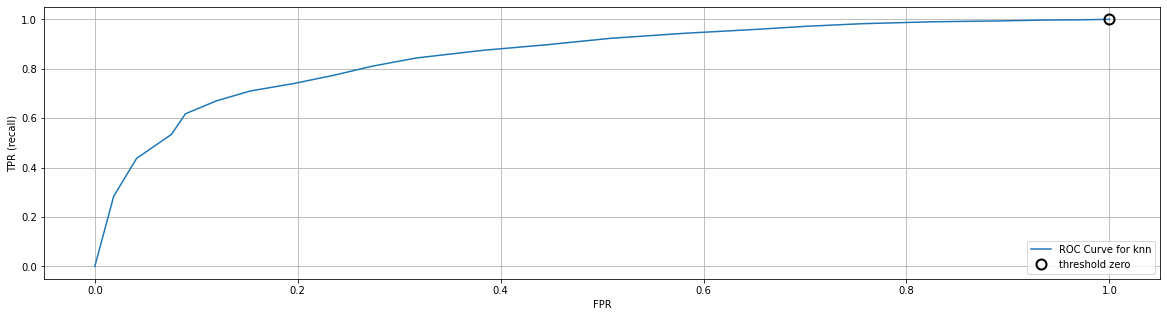

In [ ]:
%matplotlib inline 

knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for knn")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

k = 1.00  accuracy = 0.79  AUC = 0.74
k = 2.00  accuracy = 0.76  AUC = 0.80
k = 3.00  accuracy = 0.80  AUC = 0.83
k = 4.00  accuracy = 0.78  AUC = 0.83
k = 5.00  accuracy = 0.80  AUC = 0.84
k = 6.00  accuracy = 0.79  AUC = 0.84
k = 7.00  accuracy = 0.80  AUC = 0.85
k = 8.00  accuracy = 0.80  AUC = 0.85
k = 9.00  accuracy = 0.80  AUC = 0.85
k = 10.00  accuracy = 0.79  AUC = 0.85
k = 11.00  accuracy = 0.80  AUC = 0.85
k = 12.00  accuracy = 0.80  AUC = 0.85
k = 13.00  accuracy = 0.80  AUC = 0.85
k = 14.00  accuracy = 0.79  AUC = 0.85
k = 15.00  accuracy = 0.80  AUC = 0.85
k = 16.00  accuracy = 0.80  AUC = 0.85
k = 17.00  accuracy = 0.80  AUC = 0.85
k = 18.00  accuracy = 0.80  AUC = 0.85
k = 19.00  accuracy = 0.80  AUC = 0.85
k = 20.00  accuracy = 0.80  AUC = 0.85
k = 21.00  accuracy = 0.80  AUC = 0.85
k = 22.00  accuracy = 0.79  AUC = 0.85
k = 23.00  accuracy = 0.80  AUC = 0.85
k = 24.00  accuracy = 0.80  AUC = 0.85
k = 25.00  accuracy = 0.80  AUC = 0.85
k = 26.00  accuracy = 0.80  AUC = 

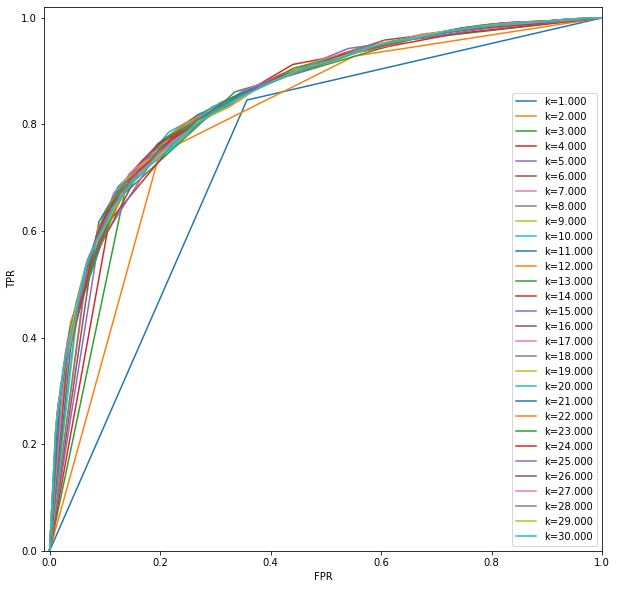

In [ ]:
%matplotlib inline

from sklearn.metrics import roc_auc_score

plt.subplots(figsize = (10,10))

for k in range(1,31): 
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test , knn.predict_proba(X_test)[:, 1])
    print("k = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
        k, accuracy, auc))
    plt.plot(fpr, tpr, label="k={:.3f}".format(k))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

In [ ]:
Full_table=[['knn classifier: ', grid_knn.best_params_,roc_auc_score(y_test, grid_knn.predict_proba(X_test)[:,1])]]

When we use scoring="roc_auc" we get n_neighbors = 21 as the best paraameter. This parameter also has accuracy = 0.82  AUC = 0.87 from the ROC_AUC score.

### 2. Logistic Regression with penalty='l2',solver='lbfgs'

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100]}
clf = LogisticRegression(penalty='l2',solver='lbfgs',random_state = 0, max_iter = 1000)
grid_clf = GridSearchCV(clf, param_grid, cv = 5, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [ ]:
grid_clf.score(X_test, y_test)

0.8328046192117216

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_clf.predict(X_test)
print('accuracy_score: {:.4f} '.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f}'.format(roc_auc_score(y_test, grid_clf.predict_proba(X_test)[:,1])))

accuracy_score: 0.7839 
roc_auc_score: 0.8328


In [ ]:
grid_clf.best_params_

{'C': 100}

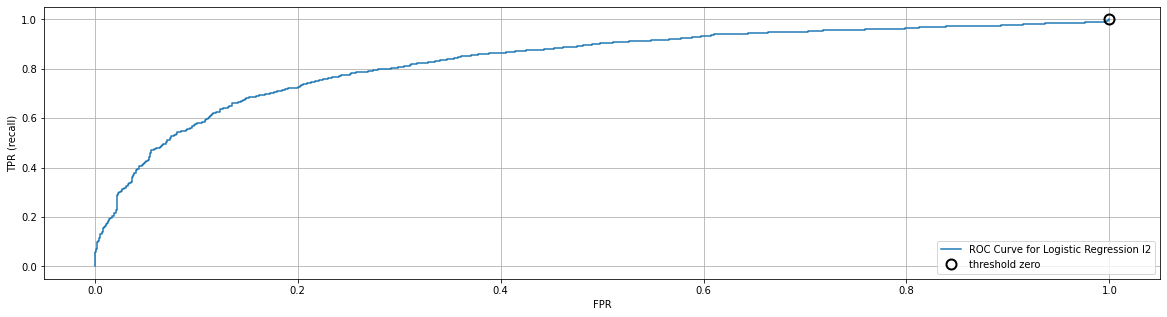

In [ ]:
%matplotlib inline 

clf = LogisticRegression(C = 100, penalty='l2',solver='lbfgs',random_state = 0, max_iter = 1000)
clf.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for Logistic Regression l2")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [ ]:
Full_table +=[['Logistic Regression classifier (l2): ', grid_clf.best_params_,roc_auc_score(y_test, grid_clf.predict_proba(X_test)[:,1])]]

### 3. Logistic Regression with penalty='l1',solver='liblinear'

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100]}
clf = LogisticRegression(penalty='l1',solver='liblinear',random_state = 0, max_iter = 1000)
grid_clf = GridSearchCV(clf, param_grid, cv = 5, scoring= 'roc_auc')
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, penalty='l1',
                                          random_state=0, solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [ ]:
grid_clf.score(X_test, y_test)

0.832806220769076

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_clf.predict(X_test)
print('accuracy_score:{:.4f}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f} '.format(roc_auc_score(y_test, grid_clf.predict_proba(X_test)[:,1])))

accuracy_score:0.7839
roc_auc_score: 0.8328 


In [ ]:
grid_clf.best_params_

{'C': 10}

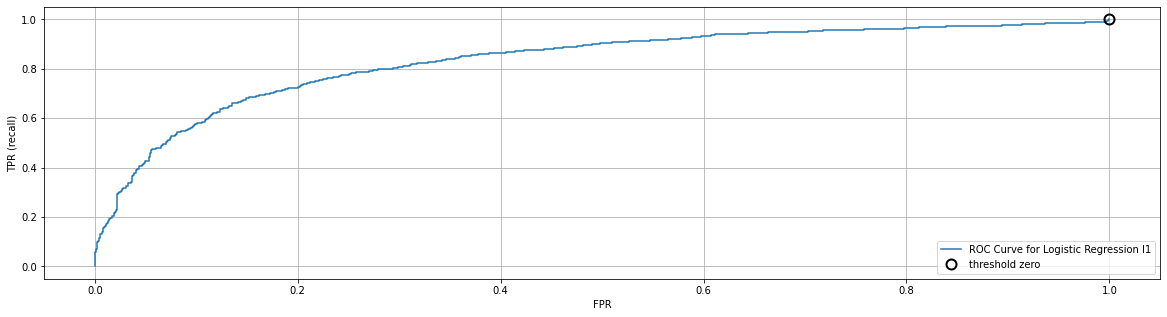

In [ ]:
%matplotlib inline 

clf = LogisticRegression(C = 10, penalty='l1',solver='liblinear',random_state = 0, max_iter = 1000)
clf.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for Logistic Regression l1")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [ ]:
Full_table +=[['Logistic Regression classifier (l1): ', grid_clf.best_params_,roc_auc_score(y_test, grid_clf.predict_proba(X_test)[:,1])]]

In the Logistic Regression, C=100 with penalty='l2',solver='lbfgs' and c=10 with penalty='l1',solver='liblinear' both give same roc_auc accuracy.

### 4. Linear SVC Classifier

In [ ]:
from sklearn.svm import LinearSVC

param_grid = {'C': [0.01,0.1,1, 10, 100,1000]}
svc_linear = LinearSVC(random_state = 0, max_iter = 1000, dual=False)
grid_svc_linear = GridSearchCV(svc_linear, param_grid, cv = 5, scoring= 'roc_auc')
grid_svc_linear.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVC(dual=False, random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             scoring='roc_auc')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_svc_linear.predict(X_test)
print('accuracy_score:{:.4f}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f} '.format(roc_auc_score(y_test, grid_svc_linear.decision_function(X_test))))

accuracy_score:0.7769
roc_auc_score: 0.8307 


In [ ]:
grid_svc_linear.best_params_

{'C': 100}

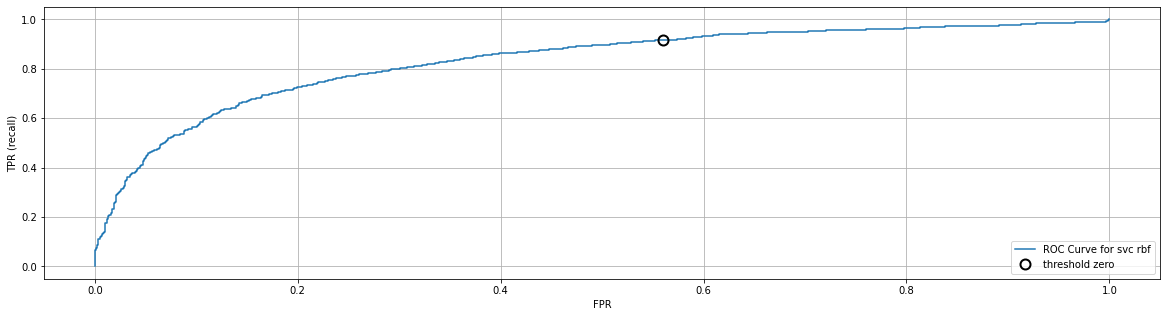

In [ ]:
%matplotlib inline 

svc_linear = LinearSVC(C = 1000, random_state = 0, max_iter = 1000, dual=False)
svc_linear.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc_linear.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for svc rbf")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [ ]:
Full_table +=[['Linear SVC classifier: ', grid_svc_linear.best_params_,roc_auc_score(y_test, grid_svc_linear.decision_function(X_test))]]

With SVM Linear we get C= 1000 with roc_auc_score: 0.8307.

### 5. SVC Classifier using kernel=rbf

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

svc_rbf = SVC(kernel = 'rbf',random_state = 0)
grid_svc_rbf = GridSearchCV(svc_rbf, param_grid, cv = 5, scoring= 'roc_auc')
grid_svc_rbf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_svc_rbf.predict(X_test)
print('accuracy_score:{:.4f}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f} '.format(roc_auc_score(y_test, grid_svc_rbf.decision_function(X_test))))

accuracy_score:0.8176
roc_auc_score: 0.8810 


In [ ]:
grid_svc_rbf.best_params_

{'C': 100, 'gamma': 0.1}

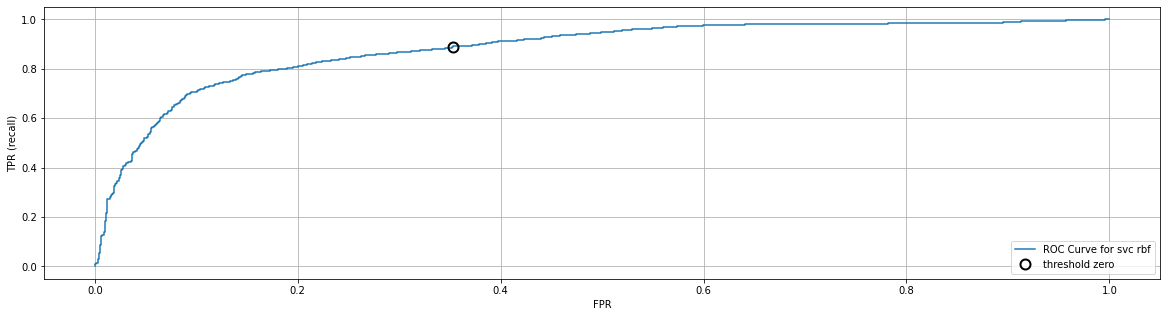

In [ ]:
%matplotlib inline 

svc_rbf = SVC(kernel = 'rbf',C = 100, gamma = 0.1, random_state = 0)
svc_rbf.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc_rbf.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for svc rbf")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [ ]:
Full_table +=[['rbf kernel SVC classifier: ', grid_svc_rbf.best_params_,roc_auc_score(y_test, grid_svc_rbf.decision_function(X_test))]]

### 6. SVC Classifier using kernel=linear

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

svc_lin = SVC(kernel = 'linear',random_state = 0)
grid_svc_lin = GridSearchCV(svc_lin, param_grid, cv = 5, scoring= 'roc_auc')
grid_svc_lin.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=0),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_svc_lin.predict(X_test)
print('accuracy_score:{:.4f}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f} '.format(roc_auc_score(y_test, grid_svc_lin.decision_function(X_test))))

accuracy_score:0.7945
roc_auc_score: 0.8419 


In [ ]:
grid_svc_lin.best_params_

{'C': 10}

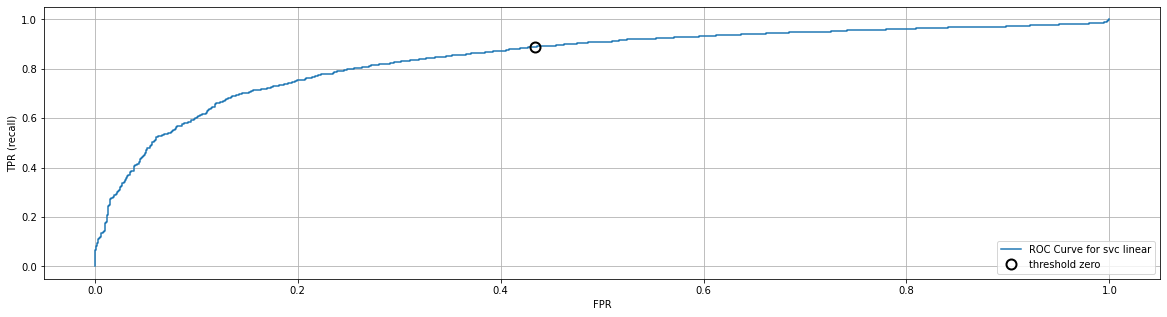

In [ ]:
%matplotlib inline 

svc_lin = SVC(kernel = 'linear',C = 10, random_state = 0)
svc_lin.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc_lin.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for svc linear")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [ ]:
Full_table +=[['linear kernel SVC classifier: ', grid_svc_lin.best_params_,roc_auc_score(y_test, grid_svc_lin.decision_function(X_test))]]

### 7. SVC Classifier using kernel=poly

In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

svc_poly = SVC(kernel = 'poly',degree=3, random_state = 0)
grid_svc_poly = GridSearchCV(svc_poly, param_grid, cv = 5, scoring= 'roc_auc')
grid_svc_poly.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=0),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='roc_auc')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_svc_poly.predict(X_test)
print('accuracy_score:{:.4f}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f} '.format(roc_auc_score(y_test, grid_svc_poly.decision_function(X_test))))

accuracy_score:0.8164
roc_auc_score: 0.8779 


In [ ]:
grid_svc_poly.best_params_

{'C': 10}

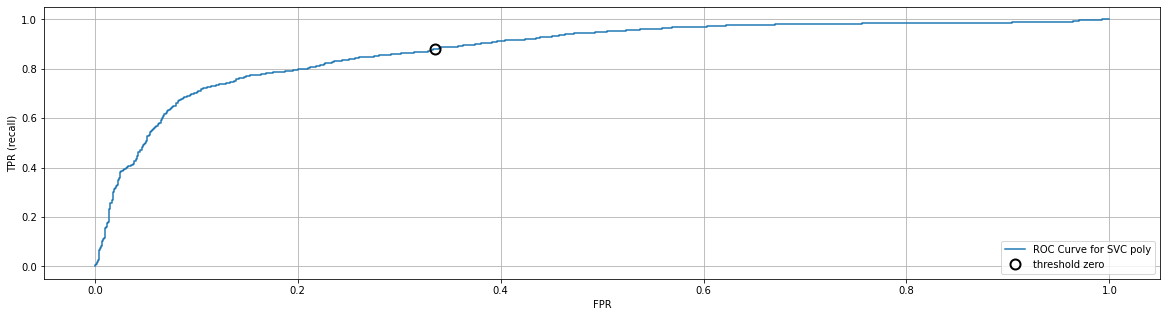

In [ ]:
%matplotlib inline 

svc_poly = SVC(kernel = 'poly',C = 10,degree=3, random_state = 0)
svc_poly.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc_poly.decision_function(X_test))

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for SVC poly")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [ ]:
Full_table +=[['Poly kernel SVC classifier: ', grid_svc_poly.best_params_,roc_auc_score(y_test, grid_svc_poly.decision_function(X_test))]]

### 8. DecisionTree Classifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [1,2,3,4,5],'min_samples_leaf': [50,60,70,80,90,100],
             'min_samples_split': [100,150,200,250,300]}

tree = DecisionTreeClassifier(random_state = 0)
grid_tree = GridSearchCV(tree, param_grid, cv = 5, scoring= 'roc_auc')
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [50, 60, 70, 80, 90, 100],
                         'min_samples_split': [100, 150, 200, 250, 300]},
             scoring='roc_auc')

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_tree.predict(X_test)
print('accuracy_score:{:.4f}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f} '.format(roc_auc_score(y_test, grid_tree.predict_proba(X_test)[:,1])))

accuracy_score:0.9225
roc_auc_score: 0.9694 


In [ ]:
grid_tree.best_params_

{'max_depth': 5, 'min_samples_leaf': 90, 'min_samples_split': 250}

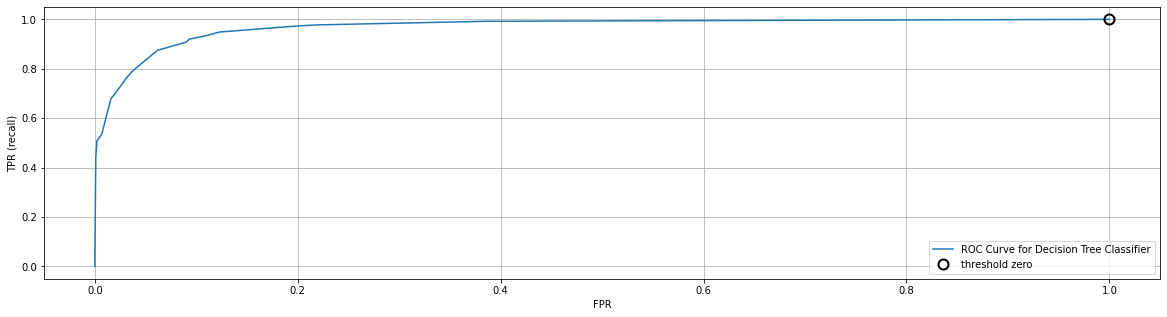

In [ ]:
%matplotlib inline 

tree = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 90, min_samples_split=250, random_state = 0)
tree.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for Decision Tree Classifier")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

In [ ]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
model = dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.4f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.4f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.9235
Accuracy on test set: 0.9184


In [ ]:
Full_table +=[['Decision Tree classifier: ', grid_tree.best_params_,roc_auc_score(y_test, grid_tree.predict_proba(X_test)[:,1])]]

### 9. Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'max_depth': [1,2,3,4,5],'min_samples_leaf': [50,60,70,80,90,100],
             'min_samples_split': [100,150,200,250,300]}

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
grid_rf = GridSearchCV(rf, param_grid, cv = 5, scoring= 'roc_auc')
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features=2, random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [50, 60, 70, 80, 90, 100],
                         'min_samples_split': [100, 150, 200, 250, 300]},
             scoring='roc_auc')

In [ ]:
# from sklearn.metrics import accuracy_score, roc_auc_score

y_pred = grid_rf.predict(X_test)
print('accuracy_score:{:.4f}'.format(accuracy_score(y_test, y_pred)))
print('roc_auc_score: {:.4f} '.format(roc_auc_score(y_test, grid_rf.predict_proba(X_test)[:,1])))

accuracy_score:0.8628
roc_auc_score: 0.9544 


In [ ]:
grid_rf.best_params_

{'max_depth': 5, 'min_samples_leaf': 90, 'min_samples_split': 200}

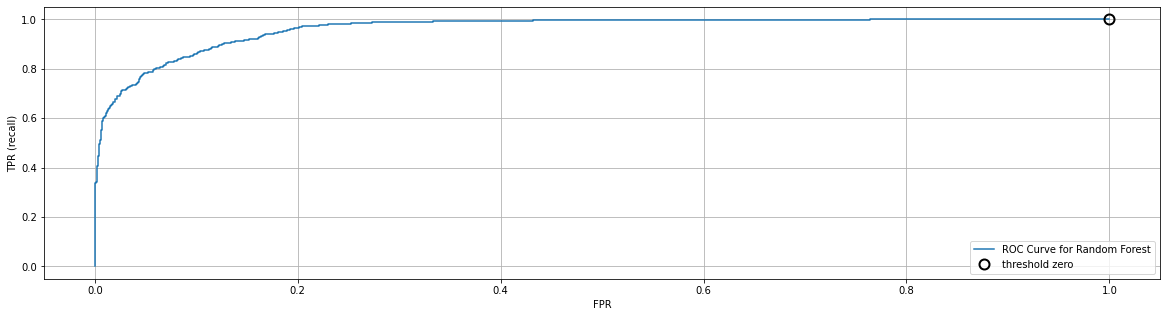

In [ ]:
%matplotlib inline 

rf = RandomForestClassifier(max_depth= 5, min_samples_leaf= 90, min_samples_split= 200, random_state = 0)
rf.fit(X_train, y_train)


from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.subplots(figsize = (20,5))
plt.plot(fpr, tpr, label="ROC Curve for Random Forest")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)
plt.grid()

### Summary of Models:

In [ ]:
Full_table +=[['Random Forest classifier: ', grid_rf.best_params_,roc_auc_score(y_test, grid_rf.predict_proba(X_test)[:,1])]]

In [ ]:
Full_table1 = pd.DataFrame(Full_table, columns=['Model','Best Hyperparameters','roc_auc score'])
Full_table1.round(4)
Full_table1

,Model,Best Hyperparameters,roc_auc score
0,knn classifier:,{'n_neighbors': 21},0.853017
1,Logistic Regression classifier (l2):,{'C': 100},0.832805
2,Logistic Regression classifier (l1):,{'C': 10},0.832806
3,Linear SVC classifier:,{'C': 100},0.830672
4,rbf kernel SVC classifier:,"{'C': 100, 'gamma': 0.1}",0.881050
5,linear kernel SVC classifier:,{'C': 10},0.841946
6,Poly kernel SVC classifier:,{'C': 10},0.877926
7,Decision Tree classifier:,"{'max_depth': 5, 'min_samples_leaf': 90, 'min_...",0.969383
8,Random Forest classifier:,"{'max_depth': 5, 'min_samples_leaf': 90, 'min_...",0.954406


We get maximun roc_auc_score: 0.9694 by using DecisionTree Classifier with 'max_depth': 5, 'min_samples_leaf': 90, 'min_samples_split': 250. Also from Auc_roc curves we observe that the decision tree curve is close to top left as comparared to other models. This also proves that area under the curve, AUC is higher for the Decision Tree Classifier. Hence this is the best model.

## Applying the best model on the dataset:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df.drop('FRAUD_NONFRAUD', axis = 1)
y = df['FRAUD_NONFRAUD']

scaler = MinMaxScaler()
X_fit = scaler.fit_transform(X)
y_fit = df['FRAUD_NONFRAUD']

tree_final = DecisionTreeClassifier(max_depth=5, min_samples_leaf= 90,min_samples_split= 200, random_state = 0)

tree_final.fit(X_fit, y_fit)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=90, min_samples_split=200,
                       random_state=0)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_final, X, y, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [0.92543228 0.92327089 0.92291066 0.9268732  0.92936937]
Average cross-validation score: 0.93


In [ ]:
pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


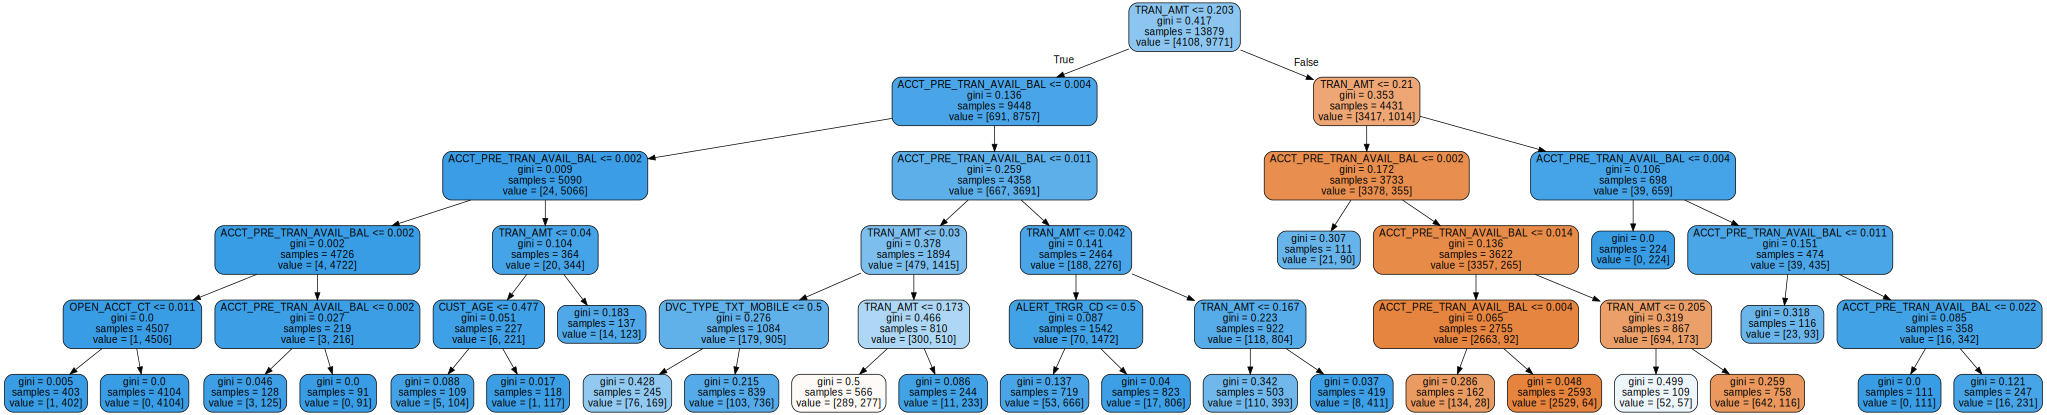

In [ ]:
import os 
import graphviz

os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz'

# Create DOT data
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_final, out_file=None, filled=True, rounded=True, feature_names=X.columns) 

# Draw graph
graph = graphviz.Source(dot_data) 

# Show graph
graph 

In [ ]:
# predict the target values for the test_set

yhat = tree_final.predict(X_test)

In [ ]:
yhat

array([0, 0, 0, ..., 1, 1, 0])